### ***Heart Failure Prediction***

*According to the Heart Failure data set from the Kaggle, we're going to predict heart failure with variables.*

In [1]:
import pandas as pd
df  = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset = df.copy()

In [2]:
# Data
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Data Columns
list(dataset.columns)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

*İlk olarak DEATH_EVENT degiskeninin adını degistirmek istiyorum.Bütün değişkenlerin küçük harfle yazılmış olması daha uygundur.*

In [4]:
# pd.DataFrame.rename(columns = {"DEATH,EVENT" : "death_event"});
dataset = dataset.rename(columns={"DEATH_EVENT": "death_event"})
list(dataset.columns)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'death_event']

*Veri setimde ikinci olarak yapmak istediğim şey istatiksel sonuçlarına bakmak olucaktır.Yani veri setini tanımaya çalışıyorum.*

In [5]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Describe
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


*Sayısal değişkenlerin istatiksel sonuçlarına göz attığımızda;*
* *Ortalama yaş : 60 ve en genç kişimiz ise 40 yaşında ne yaşlımız 95 yaşındadır.*
* *Veri setimizdeki insanların neredeyse %50'si diabetes , anaemia olduğu görülüyor.*

*Değişkenlerimizin bağımlı değişkene oranları ne kadar etkili bunları görmek isteyebiliriz.*

In [7]:
# Corr
dataset.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


*Gözümüze direk time değişkeninin çarpmıs olması gerekir.%50 oranında negatif etkiliyor.*

*Değişkenlerin etkisini bir ayrı ayrı görelim.*

In [8]:
print(dataset[['death_event']].groupby(dataset['anaemia']).mean().sort_values(by = 'death_event' , ascending=False))
print('_'*40)
print(dataset[['death_event']].groupby(dataset['sex']).mean().sort_values(by = 'death_event' , ascending=False))
print('_'*40)
print(dataset[['death_event']].groupby(dataset['smoking']).mean().sort_values(by = 'death_event' , ascending=False))
print('_'*40)
print(dataset[['death_event']].groupby(dataset['diabetes']).mean().sort_values(by = 'death_event' , ascending=False))
print('_'*40)
print(dataset[['death_event']].groupby(dataset['high_blood_pressure']).mean().sort_values(by = 'death_event' , ascending=False))

         death_event
anaemia             
1           0.356589
0           0.294118
________________________________________
     death_event
sex             
0       0.323810
1       0.319588
________________________________________
         death_event
smoking             
0           0.325123
1           0.312500
________________________________________
          death_event
diabetes             
0            0.321839
1            0.320000
________________________________________
                     death_event
high_blood_pressure             
1                       0.371429
0                       0.293814


*Ölümü etkileyen bazi değişkenlerin etkisi görmek için istatistik sonuçlarına bakma işlemi gerçekleştirdik.*

In [9]:
# Eksik Veri Analizi
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

*Veri setimizde herhangi bir eksik veri bulunmadığı için eksik veri operasyon işlemlerini gerçekleştirmemize gerek yok.*

---

##### ***Veriyi Görselleştirme***

*Bu zamana kadar tablolar üzerinde neler döndüğünü anlamaya çalışmıştık.Bunu dahada ileriye taşımak için veriyi görselleştirme işlemi gerçekleştiriyor olacağız.*

*Neyi öğrenmek istiyoruz öncelikle bunu bilmeliyiz.*

* *yaş dağılımının ölüme etkisi*
* *cinsiyet ve yaşın ölüme etkisi*
* *sigara içenlerin cinsiyete göre dağılımı*
* *şeker hastası ve sigara içenlerin ölüme etkisi*
* *sigara içenlerle kanı yoğun olanlar arasındaki ilişki*
* *zamana göre ölümün etkisi gösteren çizgisel bir grafik*

*bunun gibi veri setine sorular sorup bu soruların cevaplarını bulmalıyız.*

In [10]:
# Import Seaborn and Matplotlib
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

*Yaşın ölüme etkisine bakmadan önce yaş dağılımına bir bakalım.*

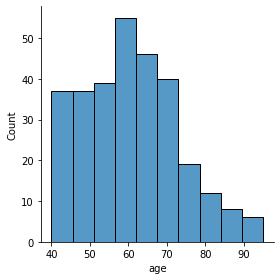

In [11]:
# age
sbn.displot(dataset.age, height=4);

*40 ile 70 yaş arasında bir toplanma mevcut.*

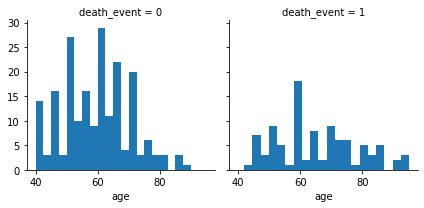

In [12]:
# age - death_event
grid = sbn.FacetGrid(dataset , col = 'death_event')
grid.map(plt.hist , 'age' , bins=20);

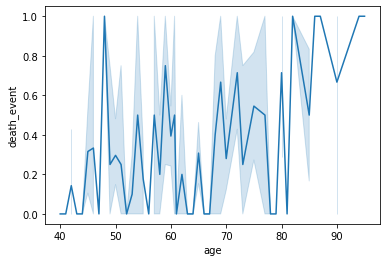

In [13]:
# age - death
sbn.lineplot(x = 'age', y = 'death_event' , data = dataset);

*İki farklı grafik ile yaşın ölüme olan etkisi incelmiş oluğ hangi yaş aralığında daha çok ölüm gerçekleştiğini görebiliriz.*

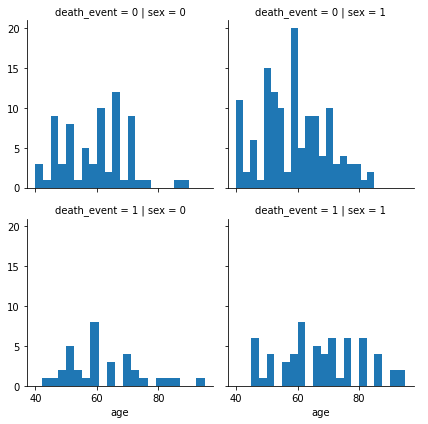

In [14]:
# age , sex --> death_event
grid = sbn.FacetGrid(dataset , 'death_event' ,'sex')
grid.map(plt.hist , 'age', bins = 20);
grid.add_legend();

*sex : 1 --> kadın , sex : 0 --> erkek değerini temsil ediyor.Grafiğimize baktığımızda hayatta kalanların çoğunun kadın olduğunu görüyoruz.*

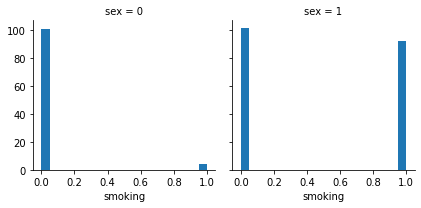

In [15]:
# smoking - sex
grid = sbn.FacetGrid(dataset , col = 'sex')
grid.map(plt.hist, 'smoking', bins = 20);

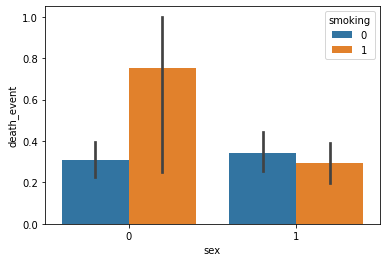

In [16]:
sbn.barplot(x = "sex", y = "death_event", hue = "smoking", data = dataset);

*Cinsiyete bağlı olarak sigara içenlerin ölüm ile olan ilişkisini incelemiş olduk.*

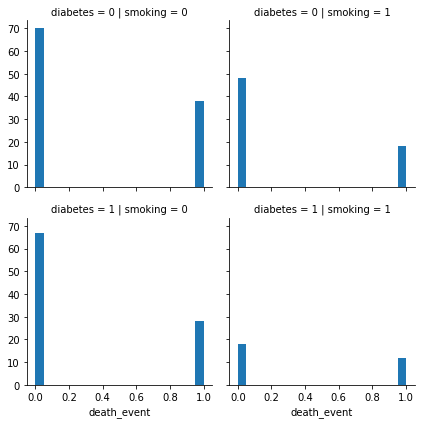

In [17]:
# diabets , smoking --> death
grid = sbn.FacetGrid(dataset , col = 'smoking' , row='diabetes')
grid.map(plt.hist, 'death_event', bins = 20);

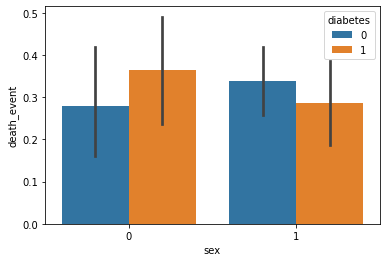

In [18]:
sbn.barplot(x = "sex", y = "death_event", hue = "diabetes", data = dataset);

*Merak ettiklerim arasında sigar içmenin kanın yoğunlukla nasıl ilişkisi olduğu ve bunun ölüme olan etkisi nedir görmek isteyebiliriz.*

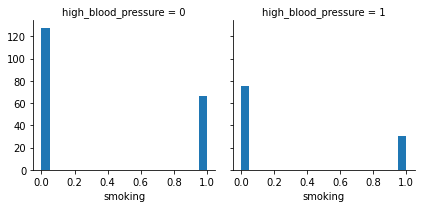

In [19]:
# high_blood_pressure - smoking
grid = sbn.FacetGrid(dataset , col = 'high_blood_pressure')
grid.map(plt.hist , 'smoking' , bins = 20);

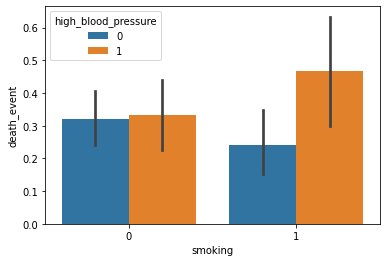

In [20]:
sbn.barplot(x = "smoking", y = "death_event", hue = "high_blood_pressure", data = dataset);

*Sigara içip aynı zamanda kanı yoğun olan kişilerin ölüm oranlarının daha yüksek olduğunu tespit ediyoruz.*

*Aynı zamanda sigara içenlerin kanının daha yoğun olduğunu görebiliyoruz.*

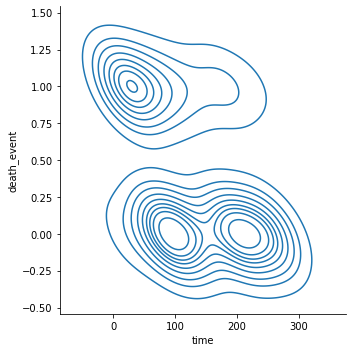

In [21]:
# death_event - time
sbn.displot(data = dataset, y = 'death_event', x="time", kind="kde");

----

#### ***Değişken Mühendisliği***

*Veri setinde yaş değişkeninin belirli bir aralıkla sınırlandırma işlemi gerçekleştirmek isteyebiliriz.Veri setindeki yaş değişkenini incelediğimizde belirli bir aralıkta toplanıyor bu yüzden sayısal sınıflandırma dönüşüme gerçekleştirerek daha sağlıklı sonuça ulaşabilme şansımız bulunuyor.*

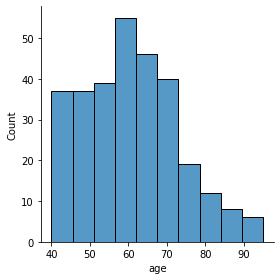

In [22]:
# age
sbn.displot(dataset.age, height=4);

*Dönüşümler;*
* ***39 < yaş <= 60: 1***
* ***60 < yaş <= 70 :2***
* ***yaş > 70 : 3***

In [23]:
# age

dataset.loc[(dataset['age'] > 39) & (dataset['age'] <= 60 ), 'age'] = 1
dataset.loc[(dataset['age'] > 60) & (dataset['age'] <= 70), 'age']   = 2
dataset.loc[ dataset['age'] > 70, 'age'] = 3
dataset['age'] = dataset['age'].astype(int)

dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,3,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,1,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,2,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,1,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,2,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


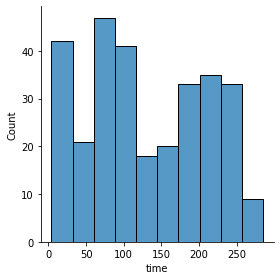

In [24]:
# time
sbn.displot(dataset.time, height=4);

In [25]:
# copy
datasetcpy = dataset.copy()

In [26]:
# time
datasetcpy.loc[ datasetcpy['time'] <= 0, 'time'] = 0
datasetcpy.loc[(datasetcpy['time'] > 0) & (datasetcpy['time'] <= 40 ), 'time'] = 1
datasetcpy.loc[(datasetcpy['time'] > 40) & (datasetcpy['time'] <= 60  ), 'time'] = 2
datasetcpy.loc[(datasetcpy['time'] > 60 ) & (datasetcpy['time'] <= 120), 'time']   = 3
datasetcpy.loc[(datasetcpy['time'] > 120 ) & (datasetcpy['time'] <= 180), 'time']   = 4
datasetcpy.loc[(datasetcpy['time'] > 180 ) & (datasetcpy['time'] <= 260), 'time']   = 5
datasetcpy.loc[ datasetcpy['time'] > 260, 'time'] = 6

datasetcpy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,3,0,582,0,20,1,265000.00,1.9,130,1,0,1,1
1,1,0,7861,0,38,0,263358.03,1.1,136,1,0,1,1
2,2,0,146,0,20,0,162000.00,1.3,129,1,1,1,1
3,1,1,111,0,20,0,210000.00,1.9,137,1,0,1,1
4,2,1,160,1,20,0,327000.00,2.7,116,0,0,1,1


In [27]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,3,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,1,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,2,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,1,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,2,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


*time degiskeni donusturme isleminde iki farklı veri seti olusturarak model sırasında donustulmus ve donusturulmemis veri setlerini görmek istiyoruz bu sekilde yaptıgımız donusumun saglıklı olup olmadıgına karar verecegiz.*

----

#### ***Model ve Tahmin***

*Model aşaması iki şekilde gerçeklişek bunlar;*
* *Model*
* *Tahmin*

*Modelimiz kurduktan sonra sonra model tuning dediğimiz modelimiz için en uygun parametre bulma işlemini gerçekleştirerek final model kurulum işlemi yapacağız.*

*Bu tüm işlemlerden önce veri setimizin test ve train seti olarak ayırma işlemi gerçekleştirecez.Bunun temel  gayesi veri setimizin bir kısmını eğitmek için ardından ortaya çıkan modeli ise ayırdığımız diğer kısım olan test kısmı ile tahmin edeceğiz.*

In [29]:
# Bapımlı Değişken [death_event]
y = dataset['death_event']
# Bağımsız Değişkenler 
X = dataset.drop(columns=['death_event'],axis=1)

In [45]:
# Test ve Train Sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(239, 12)
(239,)
(60, 12)
(60,)


In [41]:
# datasetcopy 
copyY = datasetcpy['death_event']
copyX = datasetcpy.drop(columns=['death_event'],axis=1)

In [ ]:
# train_test_split - dataset
from sklearn.model_selection import train_test_split
(x_train , x_test  , y_train , y_test) = train_test_split(X , y , test_size = 0.20 , random_state=1)

In [35]:
# train_test_split - datasetcopy
(x_traincpy , x_testcpy  , y_traincpy, y_testcpy) = train_test_split(copyX , copyY , test_size = 0.20 , random_state=1)

---

In [37]:
# Predict Library
from sklearn.metrics import accuracy_score , classification_report

##### ***Lojistik Regresyon Modeli***

In [40]:
# dataset
from sklearn.linear_model import LogisticRegression

loj = LogisticRegression()
loj_model = loj.fit(x_train , y_train)
y_pred = loj_model.predict(x_test)
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.64      0.69      0.67        13

    accuracy                           0.85        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.85      0.85      0.85        60



In [76]:
# datasetcopy
from sklearn.linear_model import LogisticRegression

lojcpy = LogisticRegression()
lojcpy_model = loj.fit(x_traincpy , y_traincpy)
y_predcpy = loj_model.predict(x_testcpy)
print(classification_report(y_predcpy , y_test))
accuracy_score_loj = accuracy_score(y_test , y_predcpy)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.71      0.77      0.74        13

    accuracy                           0.88        60
   macro avg       0.82      0.84      0.83        60
weighted avg       0.89      0.88      0.88        60



*Yaptığımız donüstürme islemi ile birlikte accuracy skor değerini 0.3 attırma sağlamış olduk.Böyle bir değişken dönüştürme işleminden emin olamadığım için veri setimi bozmadan kopyasını çıkardım ve onun üzerinden model kurulum işlemi gerçekleştirerek test etmek istedim.*

---

##### ***Random Forest Sınıflandırma Modeli***

In [77]:
# dataset
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(x_train ,y_train)
y_pred_rfc = rf_model.predict(x_test)
print(classification_report(y_pred_rfc , y_test))
accuracy_score_rf = accuracy_score(y_test , y_pred_rfc)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.86      0.92      0.89        13

    accuracy                           0.95        60
   macro avg       0.92      0.94      0.93        60
weighted avg       0.95      0.95      0.95        60



In [91]:
# datasetcopy
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(x_traincpy ,y_traincpy)
y_pred_rfcCpy = rf_model.predict(x_testcpy)
print(classification_report(y_pred_rfcCpy , y_testcpy))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.86      0.80      0.83        15

    accuracy                           0.92        60
   macro avg       0.90      0.88      0.89        60
weighted avg       0.92      0.92      0.92        60



*Random forest modeli icin* ***time*** *değişkeni üzerinde yaptığımız dönüsüm olum sonuç vermedi.Değişken mühendisliği uygulandığında bazı modeller çok daha uygun sonucçlar verebilirler.*

---

##### ***CART Modeli ( Kara Ağacı Sınıflandırma Modeli)***

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train , y_train)
y_pred_cart = dt_model.predict(x_test)
print(classification_report(y_pred_cart , y_test))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        39
           1       0.79      0.52      0.63        21

    accuracy                           0.78        60
   macro avg       0.78      0.72      0.74        60
weighted avg       0.78      0.78      0.77        60



In [92]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_model = dt.fit(x_traincpy , y_traincpy)
y_pred_cart_cpy = dt_model.predict(x_testcpy)
print(classification_report(y_pred_cart_cpy , y_testcpy))
accuracy_score_cart = accuracy_score(y_test , y_pred_cart_cpy)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        44
           1       0.64      0.56      0.60        16

    accuracy                           0.80        60
   macro avg       0.75      0.72      0.73        60
weighted avg       0.79      0.80      0.80        60



----

##### ***KNeighborsClassifier (KNN En Yakın Komşu Algoritması)***

In [62]:
# dataset
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(x_train ,y_train)
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_pred_knn , y_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        50
           1       0.07      0.10      0.08        10

    accuracy                           0.63        60
   macro avg       0.44      0.42      0.43        60
weighted avg       0.68      0.63      0.66        60



In [93]:
# datasetcopy
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(x_traincpy ,y_traincpy)
y_pred_knn_copy = knn_model.predict(x_testcpy)
print(classification_report(y_pred_knn_copy , y_testcpy))
accuracy_score_knn = accuracy_score(y_test , y_pred_knn_copy)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        50
           1       0.07      0.10      0.08        10

    accuracy                           0.63        60
   macro avg       0.44      0.42      0.43        60
weighted avg       0.68      0.63      0.66        60



*time değişkenine uyguladığımız dönüşüm sonucuna rağmen KNN modelinin etkelenmediğini görüyoruz.*

*neden time üzerinde uyguladığım dönüsüme bu kadar dikkat ediyorum çünkü veri setinde istatiksel değerlere baktığımda time değişkeninin çok önemli olduğunu görüyorum.*

---

##### ***SVM ( Destek Vektör Makineleri )***

In [68]:
# dataset
from sklearn.svm import SVC

svm = SVC(kernel = "rbf")
svm_model = svm.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
print(classification_report(y_pred_svm , y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        60
           1       0.00      0.00      0.00         0

    accuracy                           0.77        60
   macro avg       0.50      0.38      0.43        60
weighted avg       1.00      0.77      0.87        60



In [75]:
# datasetcopy
from sklearn.svm import SVC

svm = SVC(kernel = "rbf")
svm_model = svm.fit(x_traincpy,y_traincpy)
y_pred_svm_cpy = svm_model.predict(x_testcpy)
print(classification_report(y_pred_svm_cpy , y_testcpy))
accuracy_score_svm = accuracy_score(y_test , y_pred_svm_cpy)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        60
           1       0.00      0.00      0.00         0

    accuracy                           0.77        60
   macro avg       0.50      0.38      0.43        60
weighted avg       1.00      0.77      0.87        60



----

##### ***Model Sonucları***

In [96]:
models = pd.DataFrame({'models':['Lojistik Regresyon' , 'Random Forest','CART',
                                 'KNeighbors', 'SVM '],
                     'accuracy_score':[accuracy_score_loj , accuracy_score_rf,accuracy_score_cart,accuracy_score_knn,accuracy_score_svm]})
models.sort_values(by='accuracy_score', ascending=False )

,models,accuracy_score
1,Random Forest,0.950000
0,Lojistik Regresyon,0.883333
2,CART,0.800000
4,SVM,0.766667
3,KNeighbors,0.633333


*Kurduğumuz bazi modellerin sonucunda random forest modeli %95 oranında başarı getirir.*